In [1]:
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
path1='F:\move\LEARN\sales_2014.csv'
path2='F:\move\LEARN\sales_2015.csv'
path3='F:\move\LEARN\sales_2016.csv'
path4='F:\move\LEARN\sales_2017.csv'


In [3]:
df1=pd.read_csv(path1)
df2=pd.read_csv(path2)
df3=pd.read_csv(path3)
df4=pd.read_csv(path4)

<h2> Appending the Datasets together and resetting the index </h2>

In [4]:
sales_data=pd.concat([df1,df2,df3,df4], ignore_index=True)
sales_data

,Order ID,Customer ID,SalesPerson,Order Date,Order Priority,SKU,Order Quantity,Unit Sell Price,Discount,Shipping Amount,Ship Mode,Product Container,Ship Date
0,13729,C508,Bob,1/01/2014,Not Specified,SKU947,9,95.99,0.08,35.00,Express Air,Large Box,3/01/2014
1,28774,C372,John,1/01/2014,High,SKU937,32,5.98,0.10,4.69,Regular Air,Small Box,2/01/2014
2,9285,C212,Bob,2/01/2014,Critical,SKU363,3,40.98,0.06,2.99,Regular Air,Small Box,4/01/2014
3,37537,C015,Bob,2/01/2014,Low,SKU052,4,291.73,0.00,48.80,Delivery Truck,Jumbo Drum,2/01/2014
4,37537,C015,Bob,2/01/2014,Low,SKU063,43,100.98,0.07,45.00,Delivery Truck,Jumbo Drum,4/01/2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8394,49344,C494,Bob,30/12/2017,Low,SKU979,31,19.98,0.00,4.00,Regular Air,Small Box,30/12/2017
8395,49344,C494,Bob,30/12/2017,Low,SKU883,1,832.81,0.09,24.49,Regular Air,Medium Box,30/12/2017
8396,47815,C377,Richard,30/12/2017,Not Specified,SKU114,45,13.73,0.08,6.85,Regular Air,Wrap Bag,30/12/2017
8397,50950,C768,Richard,30/12/2017,Not Specified,SKU066,6,60.98,0.06,30.00,Delivery Truck,Jumbo Drum,30/12/2017


In [5]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8399 entries, 0 to 8398
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Order ID           8399 non-null   int64  
 1   Customer ID        8399 non-null   object 
 2   SalesPerson        8399 non-null   object 
 3   Order Date         8399 non-null   object 
 4   Order Priority     8399 non-null   object 
 5   SKU                8399 non-null   object 
 6   Order Quantity     8399 non-null   int64  
 7   Unit Sell Price    8399 non-null   float64
 8   Discount           8399 non-null   float64
 9   Shipping Amount    8399 non-null   float64
 10  Ship Mode          8399 non-null   object 
 11  Product Container  8399 non-null   object 
 12  Ship Date          8399 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 853.1+ KB


Checking for missing values


In [6]:
sales_data.isnull().sum()

Order ID             0
Customer ID          0
SalesPerson          0
Order Date           0
Order Priority       0
SKU                  0
Order Quantity       0
Unit Sell Price      0
Discount             0
Shipping Amount      0
Ship Mode            0
Product Container    0
Ship Date            0
dtype: int64

In [7]:
missing_values=sales_data.notnull()

In [8]:
for column in missing_values.columns.values.tolist():
    print(column)
    print(missing_values[column].value_counts())
    print("")

Order ID
True    8399
Name: Order ID, dtype: int64

Customer ID
True    8399
Name: Customer ID, dtype: int64

SalesPerson
True    8399
Name: SalesPerson, dtype: int64

Order Date
True    8399
Name: Order Date, dtype: int64

Order Priority
True    8399
Name: Order Priority, dtype: int64

SKU
True    8399
Name: SKU, dtype: int64

Order Quantity
True    8399
Name: Order Quantity, dtype: int64

Unit Sell Price
True    8399
Name: Unit Sell Price, dtype: int64

Discount
True    8399
Name: Discount, dtype: int64

Shipping Amount
True    8399
Name: Shipping Amount, dtype: int64

Ship Mode
True    8399
Name: Ship Mode, dtype: int64

Product Container
True    8399
Name: Product Container, dtype: int64

Ship Date
True    8399
Name: Ship Date, dtype: int64



In [9]:
sales_data['Order Date']=pd.to_datetime(sales_data['Order Date'])

C:\Users\Dada\AppData\Local\Temp\ipykernel_15284\760549283.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  sales_data['Order Date']=pd.to_datetime(sales_data['Order Date'])


In [10]:
sales_data['Ship Date'] = pd.to_datetime(sales_data['Ship Date'])


C:\Users\Dada\AppData\Local\Temp\ipykernel_15284\3469192475.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  sales_data['Ship Date'] = pd.to_datetime(sales_data['Ship Date'])


In [57]:
sales_data.dtypes

Order ID                      int64
Customer ID                  object
SalesPerson                  object
Order Date           datetime64[ns]
Order Priority               object
SKU                          object
Order Quantity                int64
Unit Sell Price             float64
Discount                    float64
Shipping Amount             float64
Ship Mode                    object
Product Container            object
Ship Date            datetime64[ns]
Sales amount                float64
dtype: object

In [58]:
sales_data['Sales amount']=round(sales_data['Unit Sell Price']*sales_data['Order Quantity']*(1-sales_data['Discount']),2)

sales_data['Sales amount']

0        794.80
1        172.22
2        115.56
3       1166.92
4       4038.19
         ...   
8394     619.38
8395     757.86
8396     568.42
8397     343.93
8398     424.62
Name: Sales amount, Length: 8399, dtype: float64

In [13]:
sales_data

,Order ID,Customer ID,SalesPerson,Order Date,Order Priority,SKU,Order Quantity,Unit Sell Price,Discount,Shipping Amount,Ship Mode,Product Container,Ship Date,Sales amount
0,13729,C508,Bob,2014-01-01,Not Specified,SKU947,9,95.99,0.08,35.00,Express Air,Large Box,2014-03-01,794.80
1,28774,C372,John,2014-01-01,High,SKU937,32,5.98,0.10,4.69,Regular Air,Small Box,2014-02-01,172.22
2,9285,C212,Bob,2014-02-01,Critical,SKU363,3,40.98,0.06,2.99,Regular Air,Small Box,2014-04-01,115.56
3,37537,C015,Bob,2014-02-01,Low,SKU052,4,291.73,0.00,48.80,Delivery Truck,Jumbo Drum,2014-02-01,1166.92
4,37537,C015,Bob,2014-02-01,Low,SKU063,43,100.98,0.07,45.00,Delivery Truck,Jumbo Drum,2014-04-01,4038.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8394,49344,C494,Bob,2017-12-30,Low,SKU979,31,19.98,0.00,4.00,Regular Air,Small Box,2017-12-30,619.38
8395,49344,C494,Bob,2017-12-30,Low,SKU883,1,832.81,0.09,24.49,Regular Air,Medium Box,2017-12-30,757.86
8396,47815,C377,Richard,2017-12-30,Not Specified,SKU114,45,13.73,0.08,6.85,Regular Air,Wrap Bag,2017-12-30,568.42
8397,50950,C768,Richard,2017-12-30,Not Specified,SKU066,6,60.98,0.06,30.00,Delivery Truck,Jumbo Drum,2017-12-30,343.93


Calculating Total Sales

In [14]:
Total_Sales=sales_data.shape[0]
Total_Sales

8399

Calculating Total sales amount

In [15]:
Total_Sales_Amount=sales_data['Sales amount'].sum()
Total_Sales_Amount=round(sum(sales_data['Sales amount']),2)
Total_Sales_Amount

14740545.42

Calculating Avg order quantity

In [16]:
Avg_order_quantity=round(sales_data['Order Quantity'].mean(),2)
Avg_order_quantity

25.57

Calculating Avg unit sell price

In [17]:

Avg_unit_sell_price=round(sales_data['Unit Sell Price'].mean(),2)

Calcuting avg Discount Percentage

In [18]:
avg_discount_percentage=round(sales_data['Discount'].mean(),2)

Let's Generate the insights

1. Find the average discount percentage for each salesperson

In [19]:
avg_discount_by_salesperson=sales_data.groupby('SalesPerson')['Discount'].mean().round(3)

avg_discount_by_salesperson

SalesPerson
Bob        0.050
John       0.050
Richard    0.049
Name: Discount, dtype: float64

ploting the insight

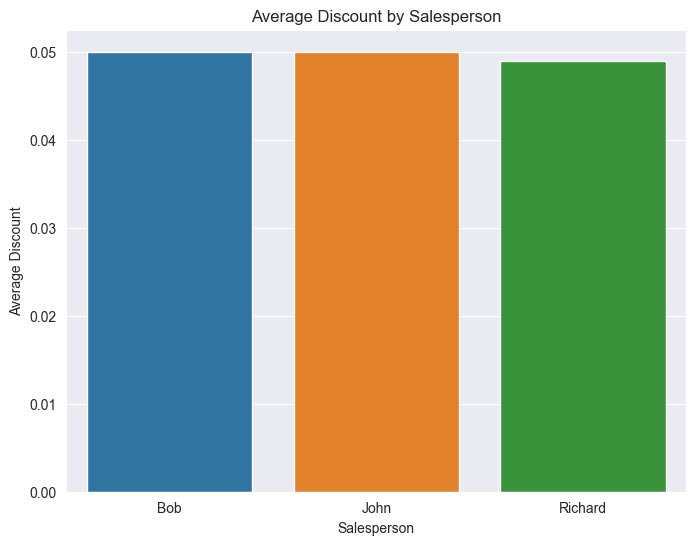

In [20]:
sns.set_style("darkgrid")
plt.figure(figsize=(8, 6))
sns.barplot(x=avg_discount_by_salesperson.index, y=avg_discount_by_salesperson.values)
plt.xlabel('Salesperson')
plt.ylabel('Average Discount')
plt.title('Average Discount by Salesperson')
plt.show()


2. Calculate the total sales for each customer

In [21]:
Total_Sales_by_customer=sales_data.groupby('Customer ID')['Order ID'].count()
Total_Sales_by_customer=Total_Sales_by_customer[:20]
Total_Sales_by_customer

Customer ID
C001     7
C002    12
C003    14
C004    12
C005    27
C006    12
C007     5
C008     4
C009     6
C010     4
C011    14
C012     6
C013    13
C014    27
C015    10
C016     7
C017     9
C018    14
C019     5
C020    18
Name: Order ID, dtype: int64

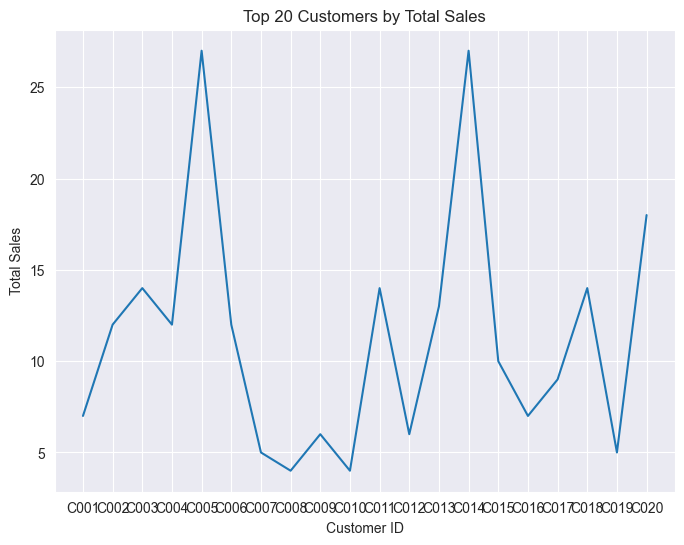

In [22]:

plt.figure(figsize=(8, 6))
plt.plot(Total_Sales_by_customer.index,Total_Sales_by_customer.values)

plt.xlabel('Customer ID')
plt.ylabel('Total Sales')
plt.title('Top 20 Customers by Total Sales')
plt.show()


3. Determine the sales distribution across different order priorities

In [60]:
sales_data.dtypes

Order ID                      int64
Customer ID                  object
SalesPerson                  object
Order Date           datetime64[ns]
Order Priority               object
SKU                          object
Order Quantity                int64
Unit Sell Price             float64
Discount                    float64
Shipping Amount             float64
Ship Mode                    object
Product Container            object
Ship Date            datetime64[ns]
Sales amount                float64
dtype: object

In [61]:
sales_distri_by_priorities=sales_data.groupby('Order Priority')['Order ID'].count()
sales_distri_by_priorities

Order Priority
Critical         1608
High             1768
Low              1720
Medium           1631
Not Specified    1672
Name: Order ID, dtype: int64

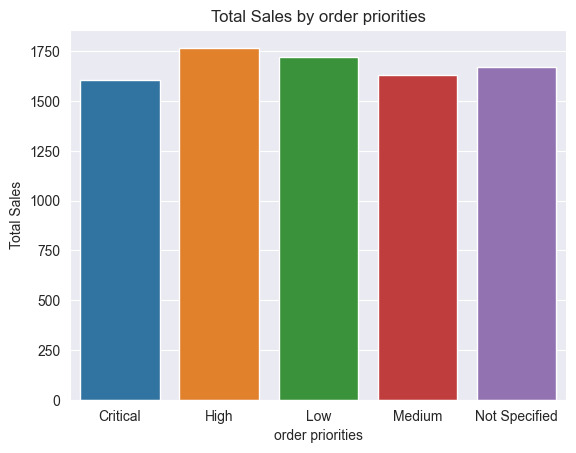

In [38]:
sns.barplot(x=sales_distri_by_priorities.index,y=sales_distri_by_priorities.values)
plt.xlabel('order priorities')
plt.ylabel('Total Sales')
plt.title('Total Sales by order priorities')
plt.show()


4. Calculate the total shipping amount for each product container

In [62]:
total_ship_amount_by_container = sales_data.groupby('Product Container')['Sales amount'].sum()
total_ship_amount_by_container

Product Container
Jumbo Box     2801683.11
Jumbo Drum    3284843.08
Large Box     2006178.19
Medium Box     674590.39
Small Box     5149408.05
Small Pack     541229.35
Wrap Bag       282613.25
Name: Sales amount, dtype: float64

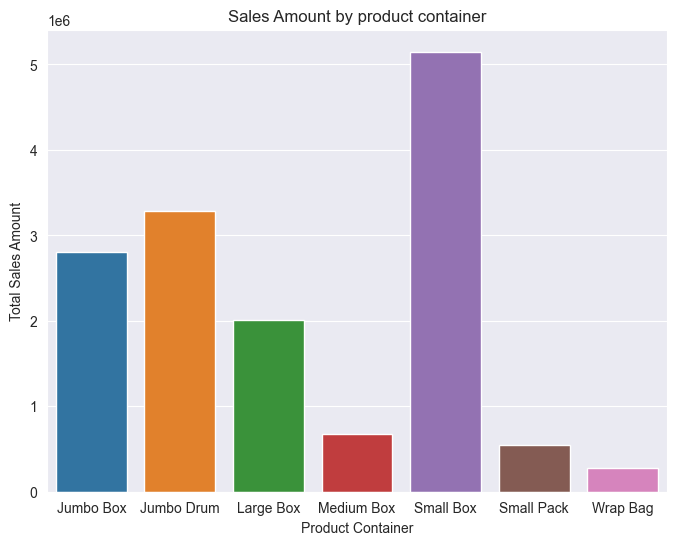

In [39]:
plt.figure(figsize=(8, 6))
sns.barplot(x=total_ship_amount_by_container.index,y=total_ship_amount_by_container.values)
plt.xlabel('Product Container')
plt.ylabel('Total Sales Amount')
plt.title('Sales Amount by product container')
plt.show()


Determine the average order quantity and unit sell price for each Salesperson

In [63]:
# Group by 'SalesPerson' and calculate average order quantity and unit sell price
average_metrics_by_salesperson= sales_data.groupby('SalesPerson').agg({'Order Quantity':'mean','Unit Sell Price':'mean'}).round(2).rename(columns={'Order Quantity':'Avg Order Quantity','Unit Sell Price':'Avg Unit Sell Price'})
average_metrics_by_salesperson

,Avg Order Quantity,Avg Unit Sell Price
SalesPerson,,
Bob,25.59,95.05
John,25.73,86.13
Richard,25.39,86.55


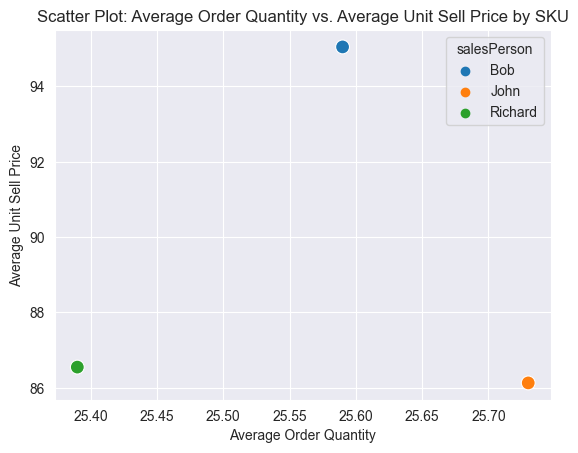

In [54]:
plt.Figure(figsize=(8,6))
sns.scatterplot(data=average_metrics_by_salesperson,x='Avg Order Quantity',y='Avg Unit Sell Price',hue='SalesPerson',s=100);
plt.xlabel('Average Order Quantity')
plt.ylabel('Average Unit Sell Price')
plt.title('Scatter Plot: Average Order Quantity vs. Average Unit Sell Price by SKU')
plt.legend(title='salesPerson')
plt.show()

Extracting Year and Month from a date column

In [72]:
#extracting year from a date column
sales_data['Order Year']=sales_data['Order Date'].dt.year
sales_data['Shipping Year']=sales_data['Ship Date'].dt.year


#extracting month from a date column

In [74]:
sales_data['Order Month']=sales_data['Order Date'].dt.strftime('%B')
sales_data['Shipping Month']=sales_data['Ship Date'].dt.strftime('%B')

In [75]:
sales_data

,Order ID,Customer ID,SalesPerson,Order Date,Order Priority,SKU,Order Quantity,Unit Sell Price,Discount,Shipping Amount,Ship Mode,Product Container,Ship Date,Sales amount,Order Year,Order Month,Shipping Year,Shipping Month
0,13729,C508,Bob,2014-01-01,Not Specified,SKU947,9,95.99,0.08,35.00,Express Air,Large Box,2014-03-01,794.80,2014,January,2014,March
1,28774,C372,John,2014-01-01,High,SKU937,32,5.98,0.10,4.69,Regular Air,Small Box,2014-02-01,172.22,2014,January,2014,February
2,9285,C212,Bob,2014-02-01,Critical,SKU363,3,40.98,0.06,2.99,Regular Air,Small Box,2014-04-01,115.56,2014,February,2014,April
3,37537,C015,Bob,2014-02-01,Low,SKU052,4,291.73,0.00,48.80,Delivery Truck,Jumbo Drum,2014-02-01,1166.92,2014,February,2014,February
4,37537,C015,Bob,2014-02-01,Low,SKU063,43,100.98,0.07,45.00,Delivery Truck,Jumbo Drum,2014-04-01,4038.19,2014,February,2014,April
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8394,49344,C494,Bob,2017-12-30,Low,SKU979,31,19.98,0.00,4.00,Regular Air,Small Box,2017-12-30,619.38,2017,December,2017,December
8395,49344,C494,Bob,2017-12-30,Low,SKU883,1,832.81,0.09,24.49,Regular Air,Medium Box,2017-12-30,757.86,2017,December,2017,December
8396,47815,C377,Richard,2017-12-30,Not Specified,SKU114,45,13.73,0.08,6.85,Regular Air,Wrap Bag,2017-12-30,568.42,2017,December,2017,December
8397,50950,C768,Richard,2017-12-30,Not Specified,SKU066,6,60.98,0.06,30.00,Delivery Truck,Jumbo Drum,2017-12-30,343.93,2017,December,2017,December


In [88]:
total_ship_amount_by_order_month = sales_data.groupby('Order Month')['Sales amount'].sum()
total_ship_amount_by_shipping_month= sales_data.groupby('Shipping Month')['Sales amount'].sum()

Total sales by order month

In [79]:
# Custom order of months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']


In [89]:
total_ship_amount_by_order_month=total_ship_amount_by_order_month.loc[month_order]
total_ship_amount_by_shipping_month=total_ship_amount_by_shipping_month.loc[month_order]

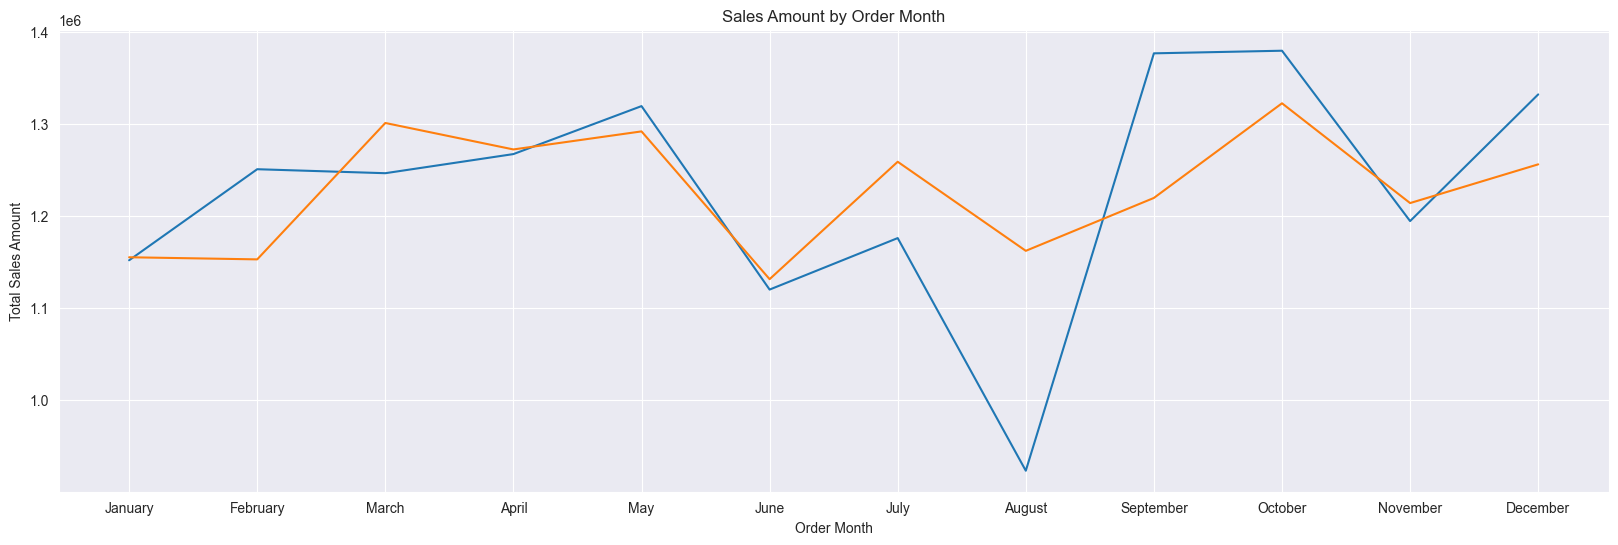

<Figure size 2000x600 with 0 Axes>

<Figure size 2000x600 with 0 Axes>

In [92]:
plt.figure(figsize=(20, 6))

sns.lineplot(x=total_ship_amount_by_order_month.index,y=total_ship_amount_by_order_month.values)
sns.lineplot(x=total_ship_amount_by_shipping_month.index,y=total_ship_amount_by_shipping_month.values)
plt.xlabel('Order Month')
plt.ylabel('Total Sales Amount')
plt.title('Sales Amount by Order Month')
plt.show()
plt.figure(figsize=(20, 6))

# sns.lineplot(x=total_ship_amount_by_shipping_month.index,y=total_ship_amount_by_shipping_month.values)
# plt.xlabel('Shipping Month')
# plt.ylabel('Total Sales Amount')
# plt.title('Sales Amount by Shipping Month')
# plt.show()
